## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [5]:
# Load dataset
data = pd.read_csv('Leads.csv')

# Display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Preparation

In [7]:
# Handle 'Select' values in categorical columns
data.replace('Select', None, inplace=True)

In [10]:
# Check for missing values
print(data.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# Check for missing values and calculate the percentage
missing_percentage = data.isnull().sum() * 100 / len(data)
print(missing_percentage)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
# Drop columns with more than 40% missing values
data = data.loc[:, missing_percentage <= 40]

# Check the remaining columns
print(data.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [13]:
# Check for missing values again
print(data.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [14]:
# Filling missing numerical values with mean
data['TotalVisits'].fillna(data['TotalVisits'].mean(), inplace=True)
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].mean(), inplace=True)

# Filling missing categorical values with mode
data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)
data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)

# Verifying no missing values remain in relevant columns
print(data.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [16]:
# Impute categorical columns with mode
for col in ['Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 
            'Tags', 'City']:data[col].fillna(data[col].mode()[0], inplace=True)

# Verify no remaining missing values
print(data.isnull().sum())

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [17]:
# Display information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [18]:
# Display summary statistics 

data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.818723,548.021466,2.145333
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


## EDA Analysis

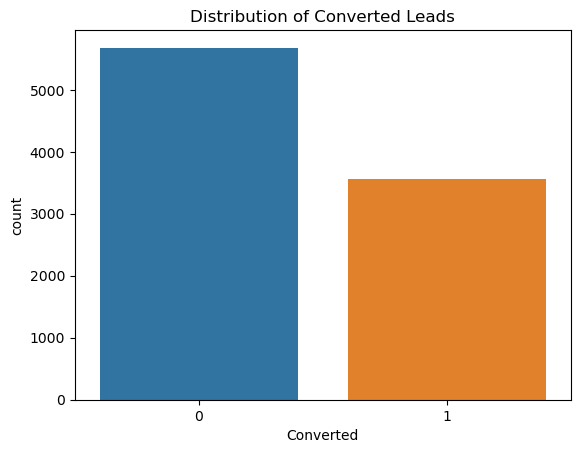

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='Converted', data=data)
plt.title('Distribution of Converted Leads')
plt.show()

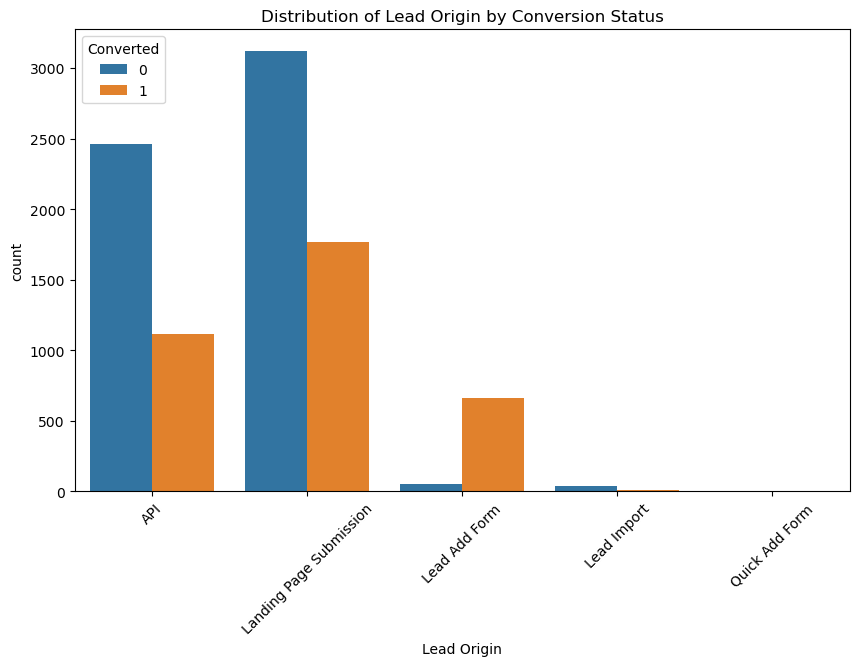

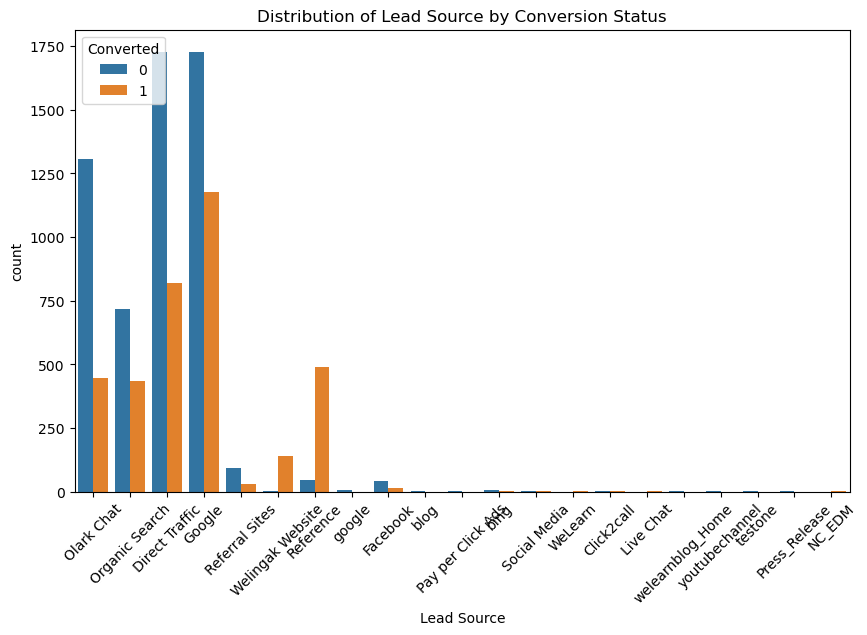

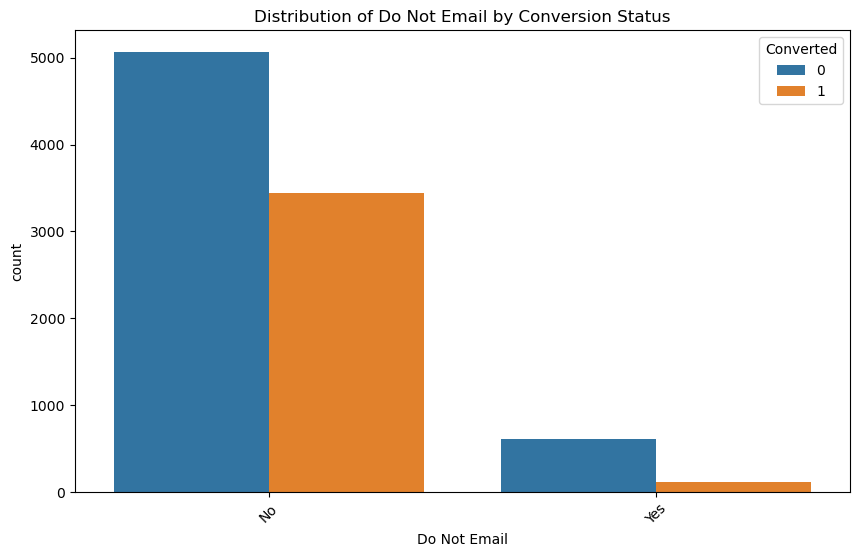

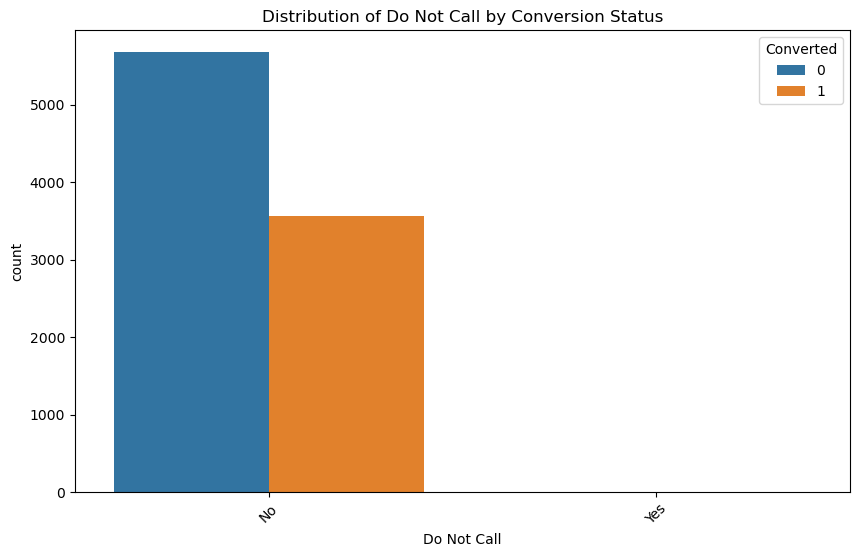

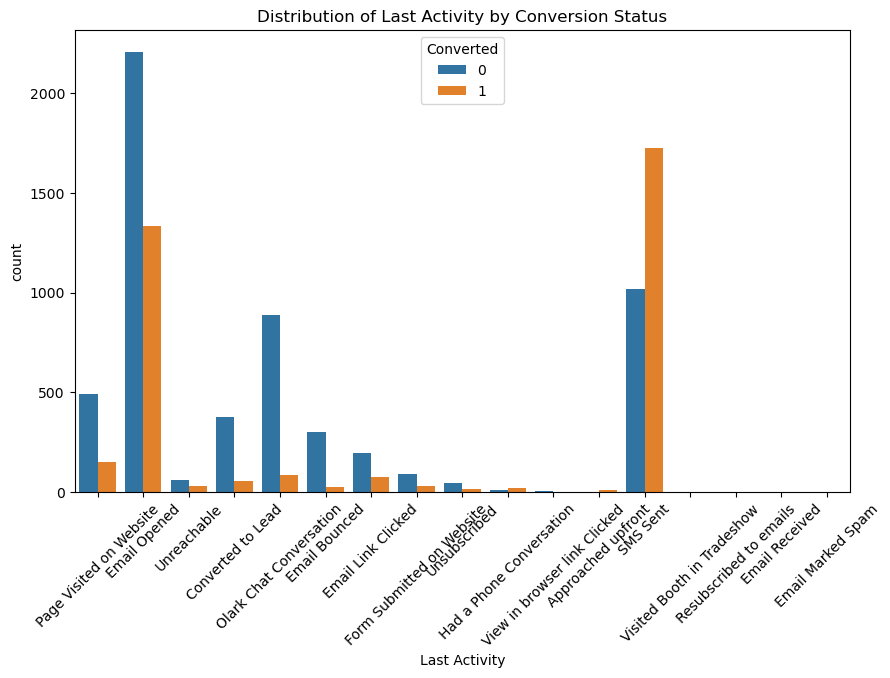

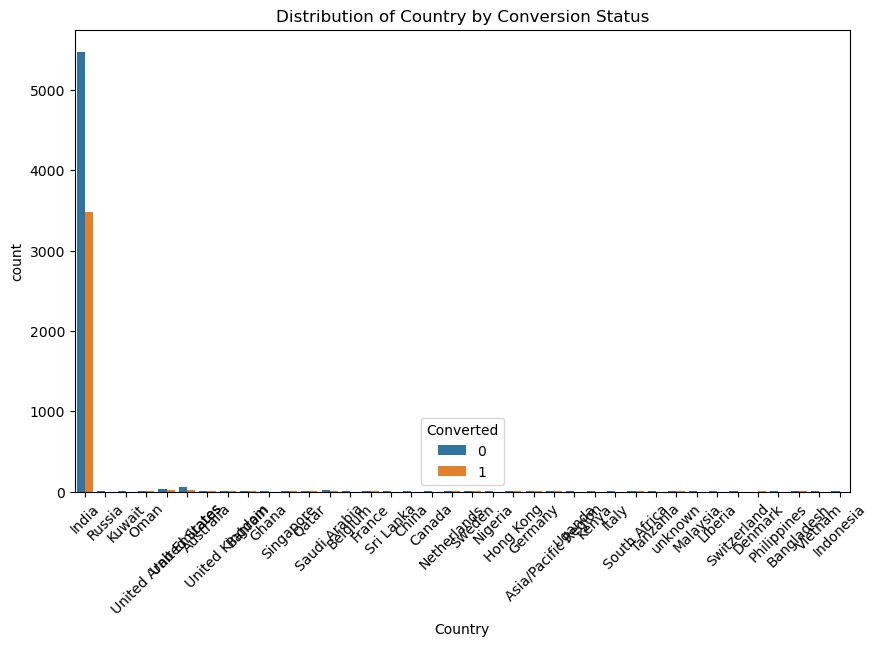

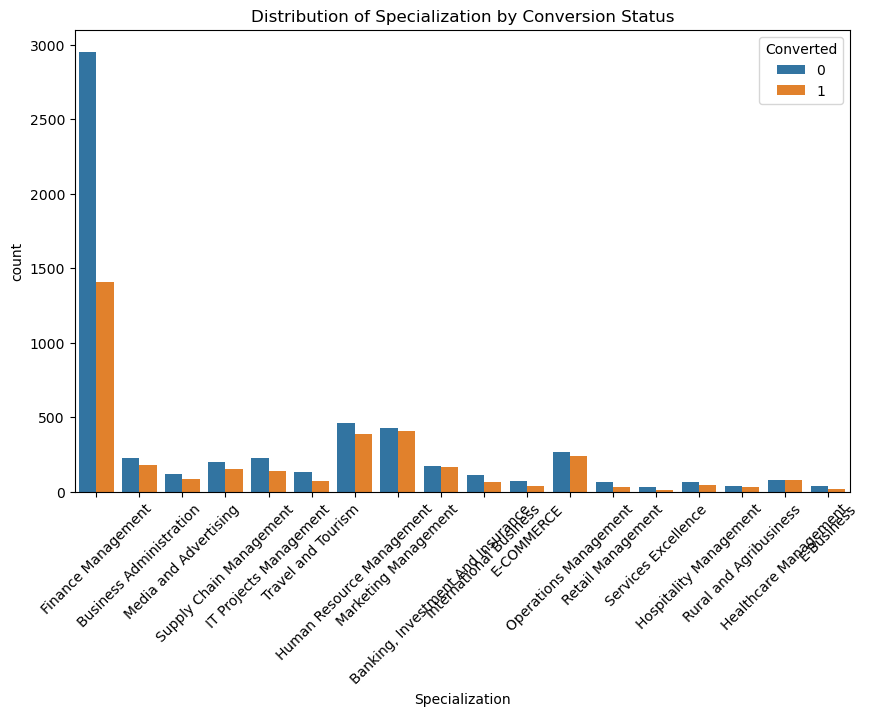

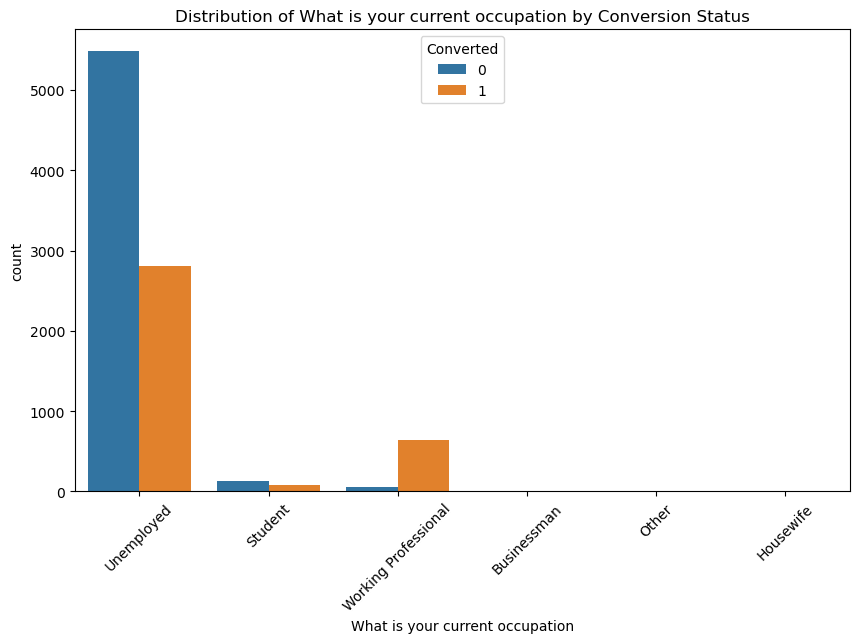

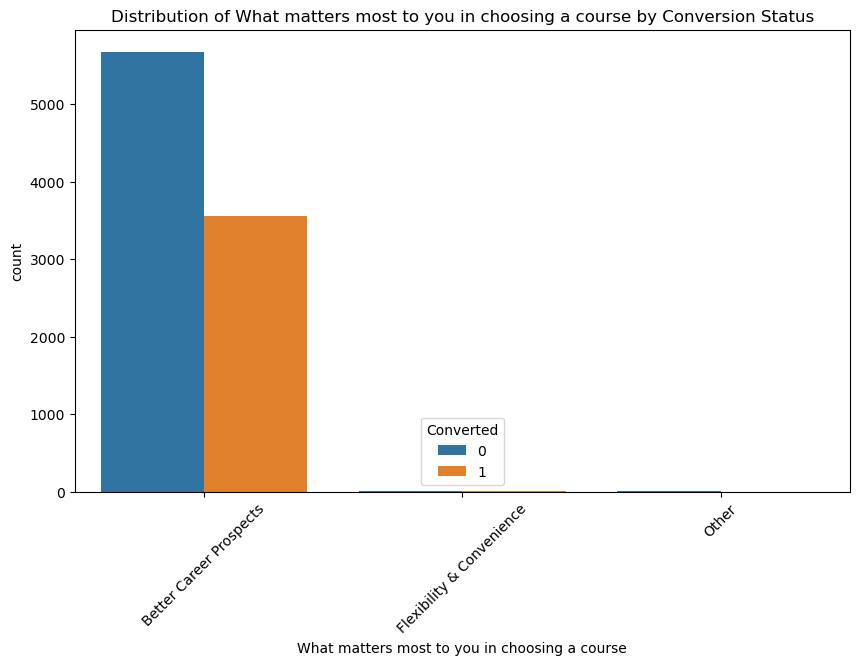

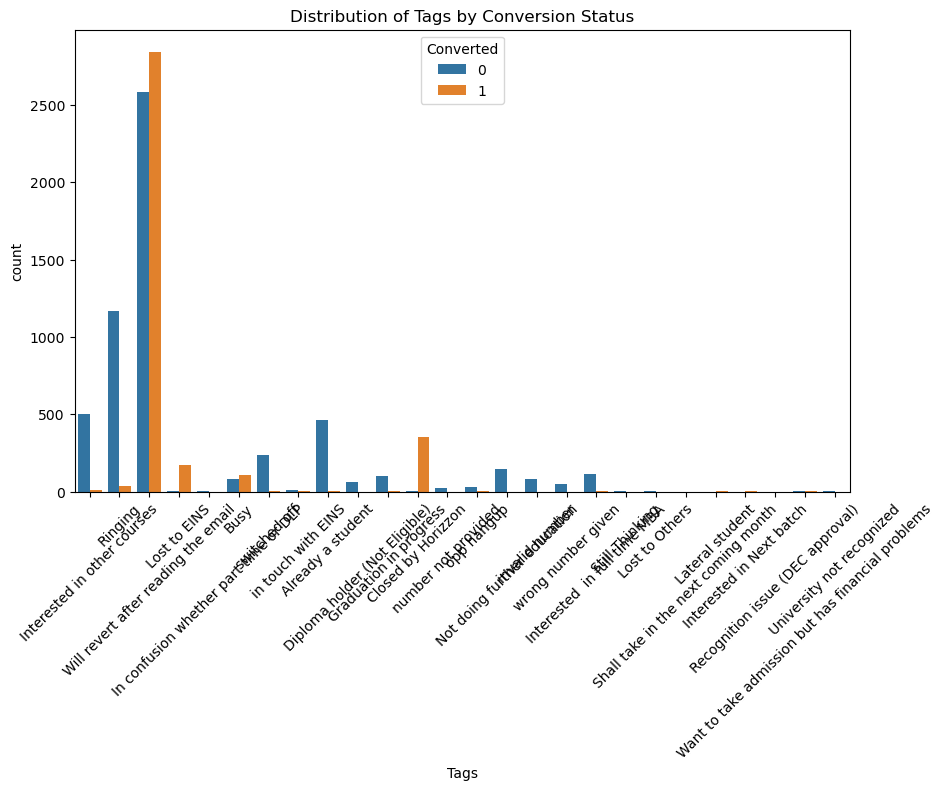

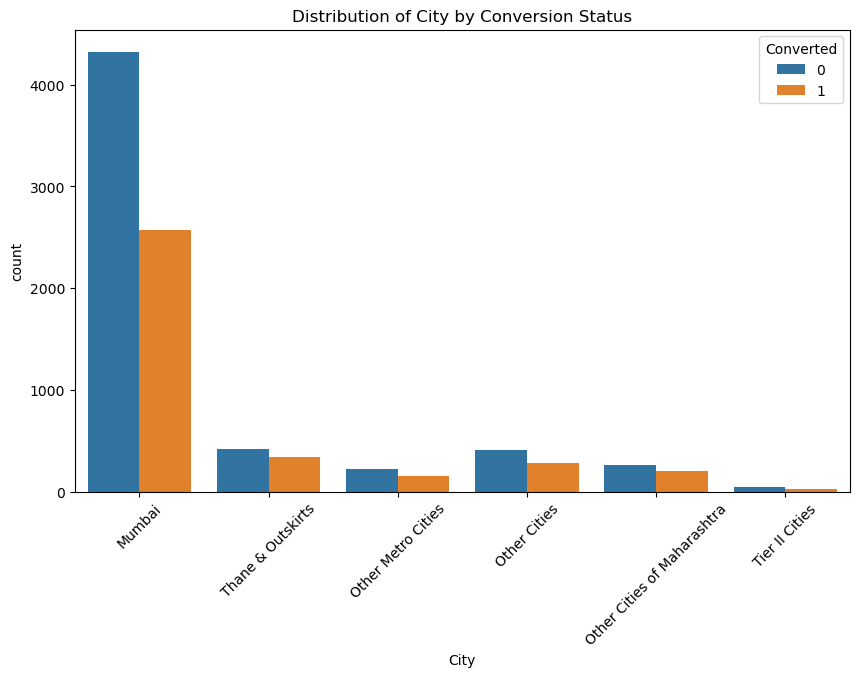

In [21]:
# List of categorical variables
categorical_vars = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 
                    'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[var], hue=data['Converted'])
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {var} by Conversion Status')
    plt.show()

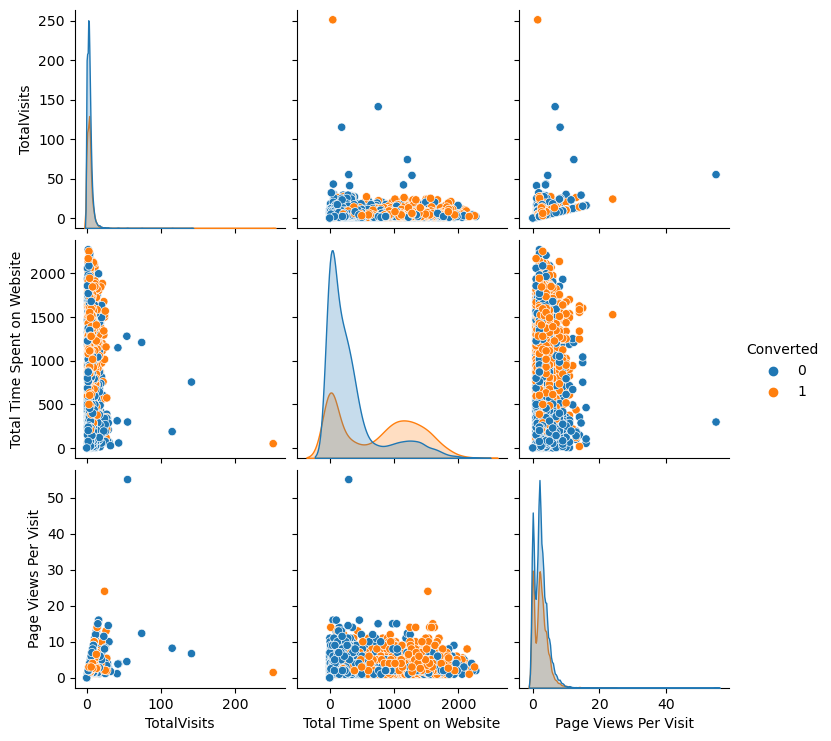

In [22]:
# Plot pairwise relationships
sns.pairplot(data, hue='Converted', vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'])
plt.show()

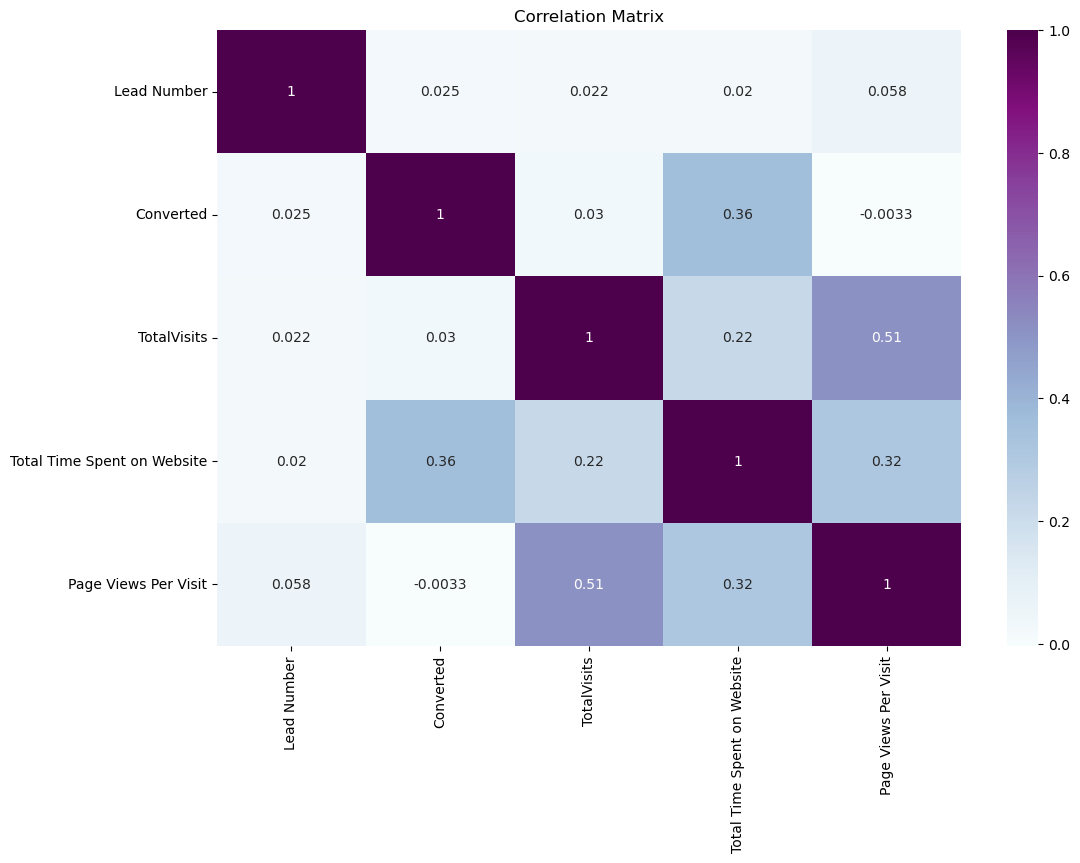

In [30]:
# Correlation matrix and heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

In [33]:
# Separate features and target variable
X = data.drop(columns='Converted')
y = data['Converted']

## Model Building & Evaluation

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Build the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Predict on the test set
y_pred = model.predict(X_test)

In [38]:
# Predict probabilities for test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [39]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1473  222]
 [ 540  537]]
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1695
           1       0.71      0.50      0.58      1077

    accuracy                           0.73      2772
   macro avg       0.72      0.68      0.69      2772
weighted avg       0.72      0.73      0.71      2772



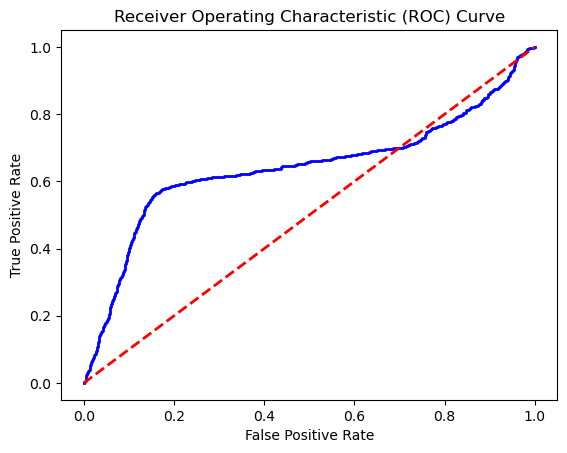

In [40]:
# Calculate and plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [41]:
# Print ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.6417186383020681


## Lead Scoring

In [42]:
# Predict probabilities for test set
lead_scores = model.predict_proba(X_test)[:, 1] * 100


In [44]:
# Attach lead scores to test set
X_test['Lead Score'] = lead_scores
X_test['Converted'] = y_test

# Display the first few rows with lead scores
print(X_test[['Lead Score', 'Converted']].head())

      Lead Score  Converted
4608   30.281355          1
7935   54.321595          0
4043   23.186374          0
7821   33.539416          0
856    27.383699          0


In [51]:
# Checking high lead scores
high_potential_leads = X_test[X_test['Lead Score'] >= 80]  # Leads with scores 80 and above

# Summary statistics of high-potential leads
print(high_potential_leads.describe())

# Count of converted leads with high scores
print(high_potential_leads['Converted'].value_counts())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [53]:
data.shape

(9240, 9399)

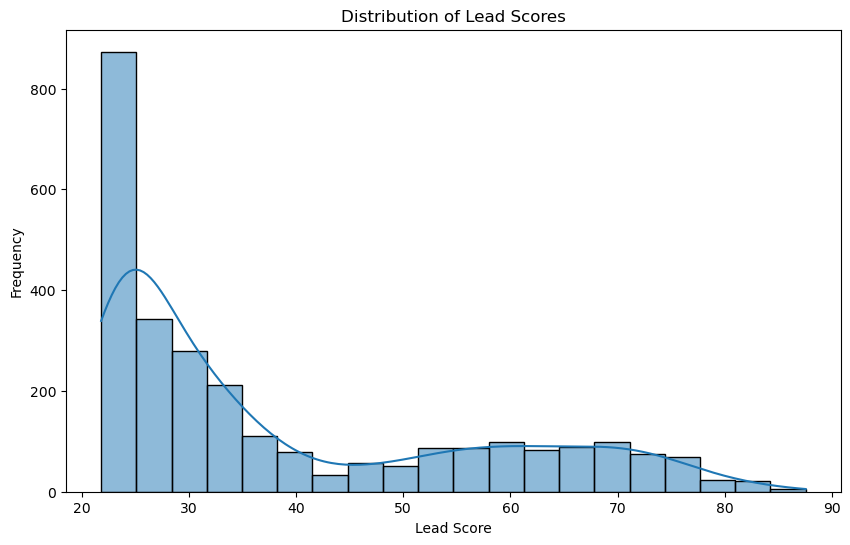

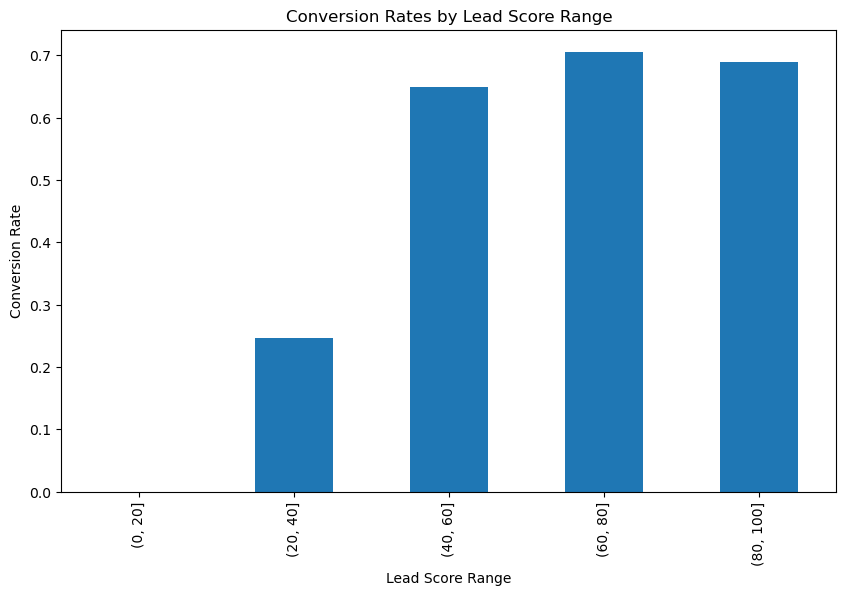

In [54]:
# Plot the distribution of lead scores
plt.figure(figsize=(10, 6))
sns.histplot(X_test['Lead Score'], bins=20, kde=True)
plt.title('Distribution of Lead Scores')
plt.xlabel('Lead Score')
plt.ylabel('Frequency')
plt.show()

# Plot conversion rates for different lead score ranges
lead_score_ranges = pd.cut(X_test['Lead Score'], bins=[0, 20, 40, 60, 80, 100])
conversion_rates = X_test.groupby(lead_score_ranges)['Converted'].mean()

plt.figure(figsize=(10, 6))
conversion_rates.plot(kind='bar')
plt.title('Conversion Rates by Lead Score Range')
plt.xlabel('Lead Score Range')
plt.ylabel('Conversion Rate')
plt.show()